In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [75]:
df=pd.read_csv("TCS1.CSV")

In [76]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [78]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [79]:
df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [80]:
mode = df['Open'].mode()[0]
df['Open'] = df['Open'].fillna(mode)

In [81]:
mode = df['High'].mode()[0]
df['High'] = df['High'].fillna(mode)

In [82]:
mode = df['Low'].mode()[0]
df['Low'] = df['Low'].fillna(mode)

In [83]:
mode = df['Close'].mode()[0]
df['Close'] = df['Close'].fillna(mode)

In [84]:
mode = df['Adj Close'].mode()[0]
df['Adj Close'] = df['Adj Close'].fillna(mode)

In [85]:
mode = df['Volume'].mode()[0]
df['Volume'] = df['Volume'].fillna(mode)

In [86]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [87]:
df.shape

(4494, 7)

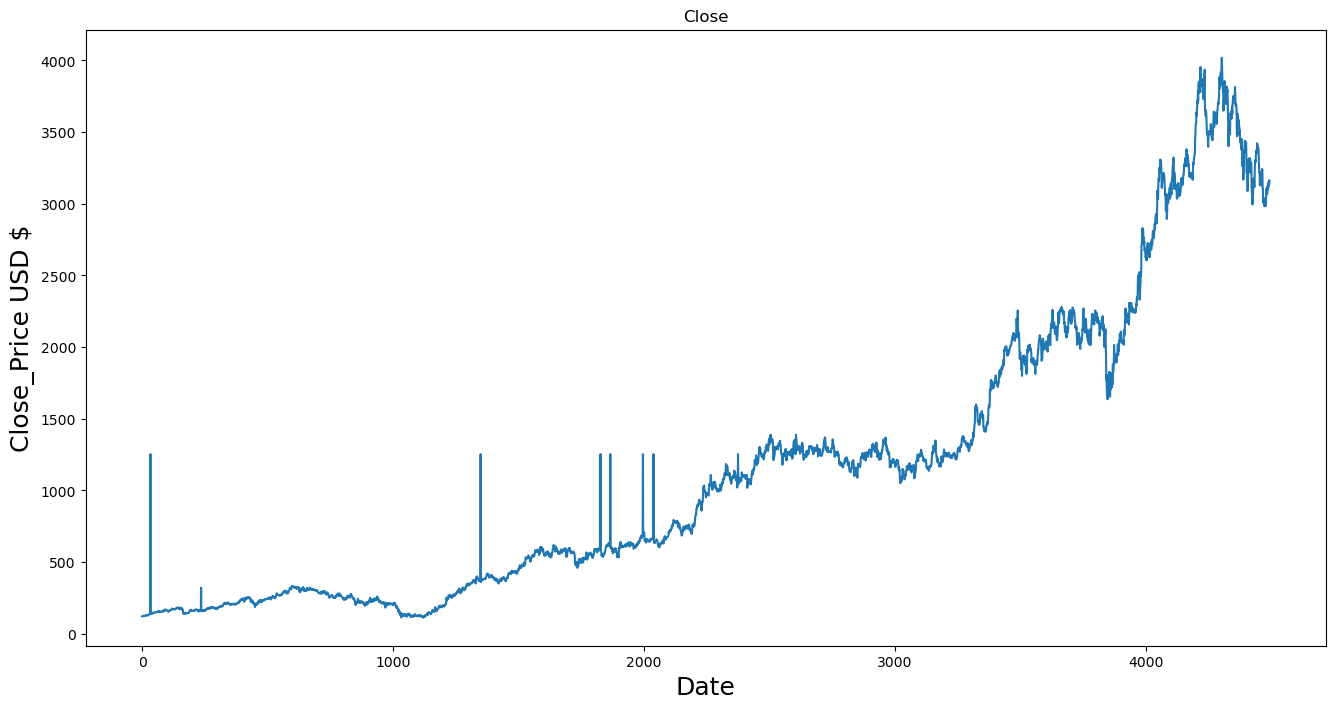

In [88]:
plt.figure(figsize=(16,8))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize= 18)
plt.ylabel('Close_Price USD $',fontsize=18)
plt.show()

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scalar = MinMaxScaler(feature_range=(0,1))

In [91]:
scaled_df = scalar.fit_transform(df.iloc[1:].drop(['Date'], axis=1))

In [92]:
scaled_df.shape

(4493, 6)

In [93]:
data = df.filter(['Close'])

In [94]:
dataset=data.values
training_data_len = math.ceil(len(dataset)* .8)

In [95]:
training_data_len

3596

In [96]:
scaled_dataset = scalar.fit_transform(dataset)

In [97]:
scaled_dataset

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

In [98]:
train_data = scaled_dataset[0:training_data_len, :]

In [99]:
train_data.shape

(3596, 1)

In [100]:
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if (i<=60):
        print(x_train)
        print(y_train)
        print()

[array([0.00224754, 0.00301848, 0.00306134, 0.00305494, 0.0032392 ,
       0.00337355, 0.00327759, 0.00330126, 0.00324048, 0.00280095,
       0.00308373, 0.00355397, 0.00394296, 0.00363714, 0.00371264,
       0.00422574, 0.00417456, 0.0049071 , 0.00510736, 0.00441   ,
       0.00436329, 0.0041061 , 0.00393976, 0.00443367, 0.00430891,
       0.00496788, 0.00588916, 0.00602352, 0.00605231, 0.00654814,
       0.00657885, 0.00629862, 0.00614379, 0.29211666, 0.00715912,
       0.00747262, 0.00783281, 0.00802283, 0.00770486, 0.00745854,
       0.00745854, 0.00719623, 0.00783089, 0.00791726, 0.00875089,
       0.0084406 , 0.00890124, 0.00855064, 0.00904647, 0.00889293,
       0.0087349 , 0.00933309, 0.00946873, 0.00965938, 0.00972016,
       0.00973615, 0.00973615, 0.0095487 , 0.01001254, 0.01083146])]
[0.010386809051353186]



In [101]:
x_train , y_train=np.array(x_train), np.array(y_train)

In [102]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3536, 60, 1)

In [103]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [104]:
model = Sequential()

In [105]:
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [106]:
model.compile(optimizer= 'adam',loss='mean_squared_error')

In [107]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3536/3536 [==============================] - 132s 36ms/step - loss: 4.0471e-04


In [108]:
test_data=scaled_dataset[training_data_len - 60 : , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [109]:
x_test = np.array(x_test)

In [110]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [111]:
x_test.shape

(898, 60, 1)

In [112]:
pred = model.predict(x_test)

29/29 [==============================] - 3s 32ms/step


In [113]:
predictions=scalar.inverse_transform(pred)

In [114]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

156.02784439457474

C:\Users\User\AppData\Local\Temp\ipykernel_23464\1574985203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


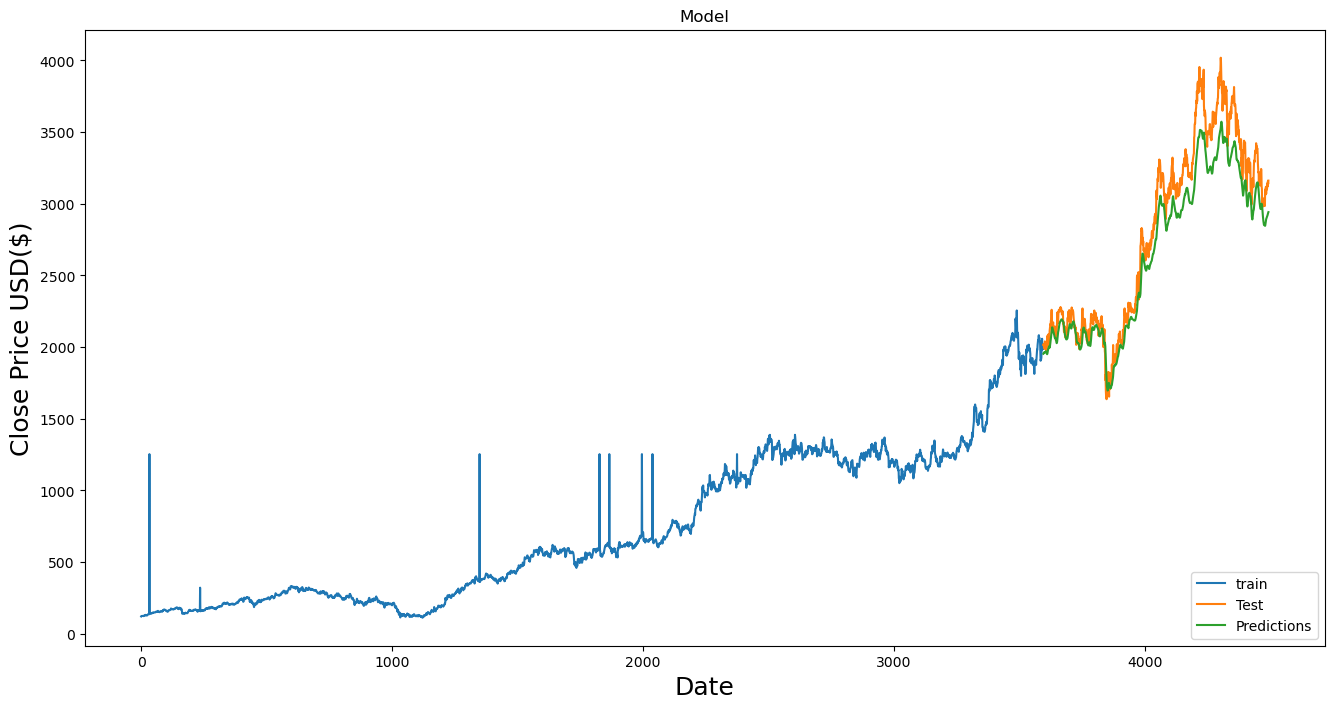

In [127]:
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.legend(['train','Test','Predictions'],loc='lower right')
plt.show()